In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('diabetes_feature.csv')
df.shape

(768, 16)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,False
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [7]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
        'Insulin_nan','low_glu_insulin']]
X.shape

(768, 9)

In [8]:
y=df['Outcome']
y.shape

(768,)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(614, 9)

In [14]:
y_train.shape

(614,)

In [16]:
X_test.shape, y_test.shape

((154, 9), (154,))

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model

DecisionTreeClassifier(random_state=42)

### 최적의 max_depth 값 찾기

In [42]:
#최적의 max_depth 구하기
for max_depth in range(3, 12):
  model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  y_predict = model.fit(X_train,y_train).predict(X_test)
  score = accuracy_score(y_test, y_predict)*100
  print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


## Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid= {'max_depth':range(3,12), 'max_features':[0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [47]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [48]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [49]:
clf.best_score_

0.8664934026389444

In [53]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.009932,0.005899,0.005994,0.003219,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.009715,0.007915,0.005866,0.004792,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.005922,0.002710,0.008663,0.004367,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
17,0.008809,0.005114,0.002273,0.000180,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.861789,0.869919,0.804878,0.894309,0.860656,0.858310,0.029337,4
27,0.008274,0.006074,0.002081,0.000091,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,4


In [54]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [55]:
clf.score(X_test, y_test)

0.8701298701298701

## RandomizedSearchCV

In [83]:
max_depth = np.random.randint(3,20,10)

In [84]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [85]:
param_distributions = {'max_depth':max_depth, 
                       'max_features':max_features,
                       'min_samples_split': list(range(2,7))}
param_distributions

{'max_depth': array([ 9, 11, 12,  8,  5, 10,  8,  5, 12, 14]),
 'max_features': array([0.81632606, 0.90009267, 0.80259902, 0.87670167, 0.83987963,
        0.75384434, 0.86982517, 0.79027823, 0.96941511, 0.95983709,
        0.8618095 , 0.80889832, 0.99011088, 0.72711469, 0.94705584,
        0.88585022, 0.98184324, 0.78690023, 0.88750064, 0.82344318,
        0.94376077, 0.8936209 , 0.99945996, 0.85524877, 0.81545769,
        0.91193809, 0.7053926 , 0.84793846, 0.84178132, 0.78004479,
        0.80748457, 0.98705637, 0.99481568, 0.96588241, 0.7121448 ,
        0.90565809, 0.88004548, 0.84352414, 0.95375894, 0.79672423,
        0.87153576, 0.83136375, 0.93280397, 0.8357656 , 0.9009065 ,
        0.80210787, 0.9572735 , 0.83443686, 0.84192462, 0.96120985,
        0.77562649, 0.79034771, 0.99913572, 0.91426401, 0.82759301,
        0.93771665, 0.9516512 , 0.90404031, 0.73677569, 0.82946757,
        0.7429928 , 0.91058292, 0.81816013, 0.83369347, 0.77247861,
        0.73013496, 0.97368572, 0.849

In [89]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model, 
                   param_distributions, 
                   n_iter=1000, 
                   scoring='accuracy',
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                   )
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 9, 11, 12,  8,  5, 10,  8,  5, 12, 14]),
                                        'max_features': array([0.81632606, 0.90009267, 0.80259902, 0.87670167, 0.83987963,
       0.75384434, 0.86982517, 0.79027823, 0.96941511, 0.95983709,
       0.8618095 , 0.80889832, 0.99011088, 0.72711469, 0.94705584,
       0...
       0.75069616, 0.96572576, 0.99974564, 0.7662105 , 0.98723024,
       0.76083215, 0.86672486, 0.73254041, 0.87020859, 0.95516595,
       0.78537018, 0.90682817, 0.70083027, 0.7272739 , 0.78067038,
       0.90209632, 0.9763871 , 0.75579163, 0.75275517, 0.78375727,
       0.89159017, 0.97777033, 0.84351048, 0.95774006, 0.839248  ,
       0.91258082, 0.8290517 , 0.9357648 , 0.80253623, 0.81572967]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_s

In [90]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.8313637476407209, 'max_depth': 10}

In [91]:
clf.best_score_

0.8730107956817272

In [92]:
clf.score(X_test, y_test)

0.8571428571428571

In [82]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.004641,0.000252,0.002293,0.000333,4,0.715009,5,"{'min_samples_split': 4, 'max_features': 0.715...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
25,0.005382,0.001546,0.002612,0.000471,3,0.874497,4,"{'min_samples_split': 3, 'max_features': 0.874...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,2
87,0.004898,0.000344,0.002561,0.000301,2,0.809774,4,"{'min_samples_split': 2, 'max_features': 0.809...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,2
63,0.006137,0.003678,0.002076,0.000102,4,0.847728,4,"{'min_samples_split': 4, 'max_features': 0.847...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,2
77,0.006739,0.002920,0.002476,0.000368,3,0.988631,12,"{'min_samples_split': 3, 'max_features': 0.988...",0.813008,0.918699,0.821138,0.878049,0.885246,0.863228,0.040187,5


## 학습과 예측하기

In [31]:
#학습 시킨다 - 정답(y_train)넣어준다
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
feature_names = X_train.columns.tolist()

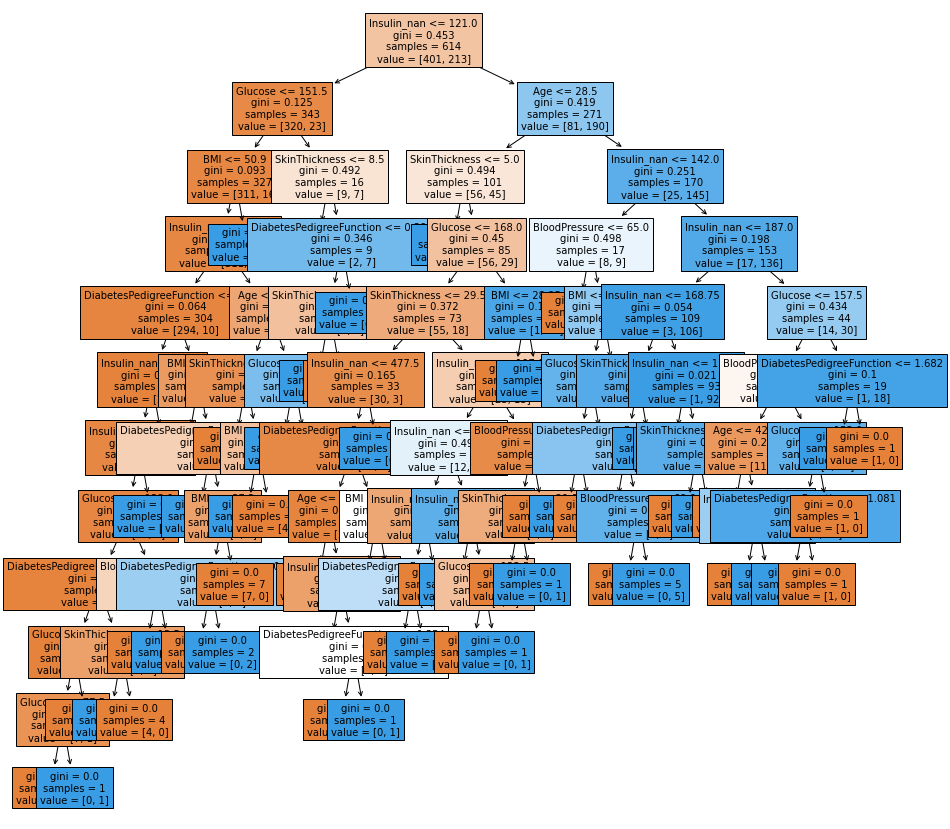

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names =feature_names , fontsize=10, filled=True)


In [32]:
#예측을 하고(예측할 때는 정답 넣어주지 않는다) 결과를 y_predict에 담는다
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

## 정확도 측정하기

In [33]:
diff_count = abs(y_predict - y_test).sum()
diff_count

28

In [ ]:
#혹은 이 방법도 가능
#(y_predict != y_test).sum()

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)*100

81.81818181818183